In [1]:
#import all the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the train and test data
test=pd.read_csv('test_koRSKBP.csv')
train=pd.read_csv('train_BRCpofr.csv')

In [3]:
#the first five rows of train data set
train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [4]:
#the first five rows of train data set
test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [5]:
#the number of rows and columns of train dataset
train.shape

(89392, 12)

In [6]:
#the number of rows and columns of test dataset
test.shape

(59595, 11)

In [7]:
#combing train and test data
train['source']="train"
test['source']="test"
df=pd.concat([train,test],ignore_index=True)

In [8]:
#checking the shape of the combined data set
df.shape

(148987, 13)

In [9]:
#displaying the first five rows of df
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,source
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308.0,train
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400.0,train
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212.0,train
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920.0,train
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736.0,train


In [10]:
#statistical description of dataset
df.describe()

,id,marital_status,vintage,claim_amount,cltv
count,148987.000000,148987.000000,148987.000000,148987.000000,89392.000000
mean,74494.000000,0.576064,4.605523,4358.303201,97952.828978
std,43008.986615,0.494182,2.287299,3272.692800,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,37247.500000,0.000000,3.000000,2402.000000,52836.000000
50%,74494.000000,1.000000,5.000000,4095.000000,66396.000000
75%,111740.500000,1.000000,6.000000,6098.000000,103440.000000
max,148987.000000,1.000000,8.000000,32534.000000,724068.000000


### Checking for null values:

In [11]:
df.isnull().sum()

id                    0
gender                0
area                  0
qualification         0
income                0
marital_status        0
vintage               0
claim_amount          0
num_policies          0
policy                0
type_of_policy        0
cltv              59595
source                0
dtype: int64

**The null values in the cltv dataset is because in the test dataset there no cltv column is present**

### Checking for duplicate values:

In [12]:
df.duplicated().sum()

0

**There are no duplicate valuees in the data set**

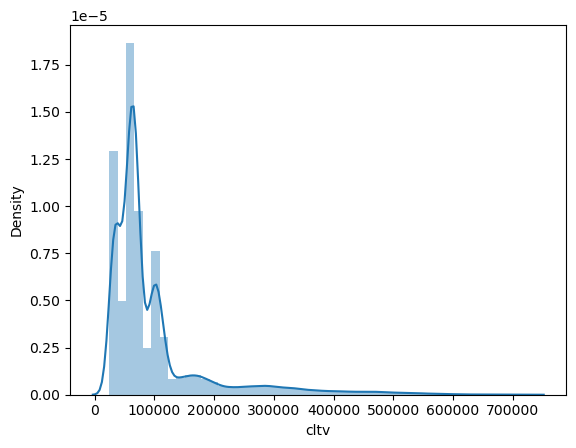

In [13]:
#distribution plot of cltv
sns.distplot(train["cltv"])
plt.show()

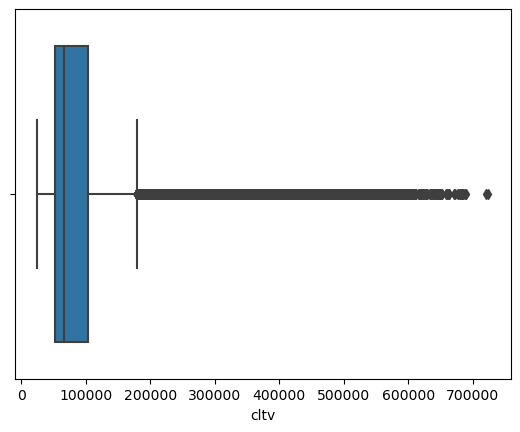

In [14]:
sns.boxplot(train["cltv"])
plt.show()

**From the distribution and box plot we can infer that CLTV is highly right skewed. There are lot of outliers in our dependent variable but we cant treat them directly because they are influential points.**

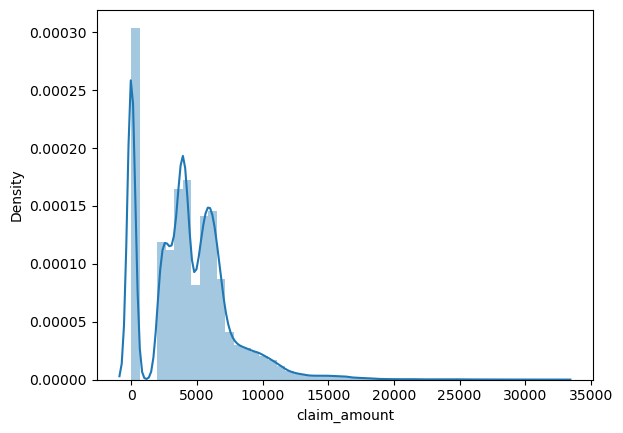

In [15]:
#univariate analysis
sns.distplot(df["claim_amount"])
plt.show()

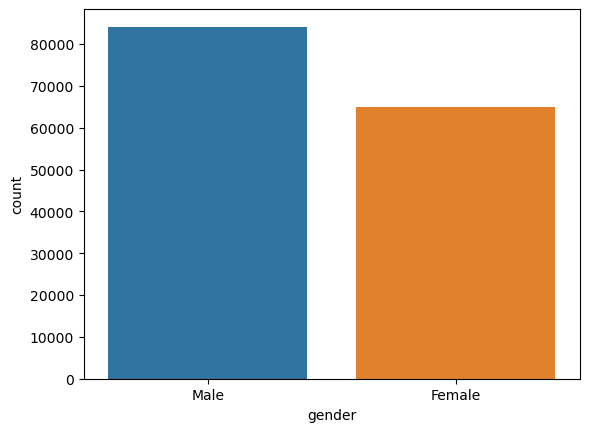

In [16]:
sns.countplot(df["gender"])
plt.show()

*There are more males than females containng policies*

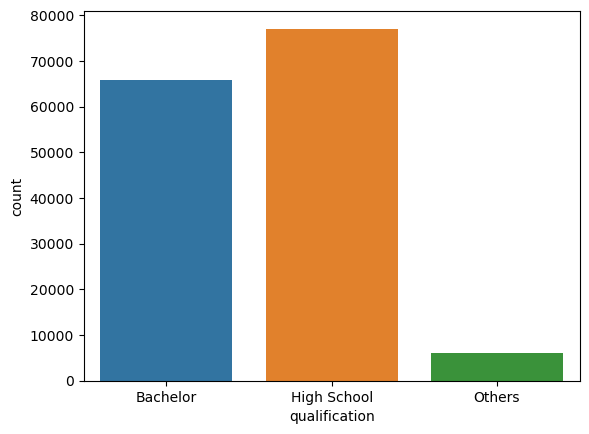

In [17]:
sns.countplot(df["qualification"])
plt.show()

*From the countplot it is observed that most of the customers are highschool graduates*

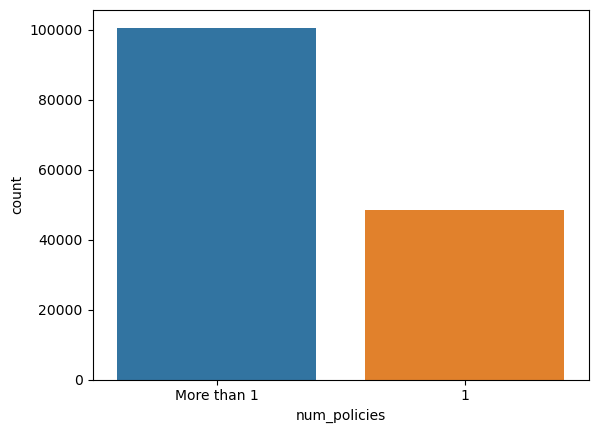

In [18]:
sns.countplot(df["num_policies"])
plt.show()

*from the countplot it is observed that most of the customers opted for morethan 1 policies

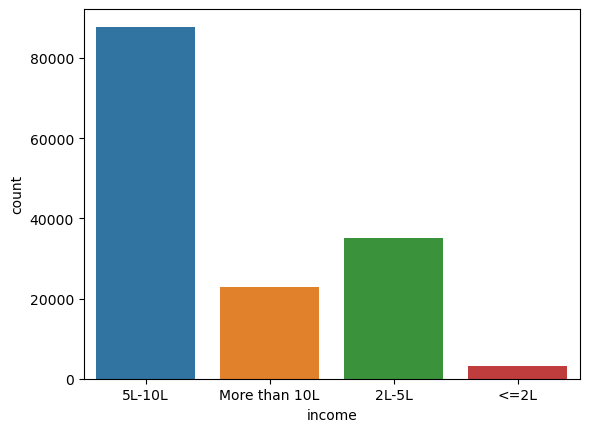

In [19]:
sns.countplot(df["income"])
plt.show()

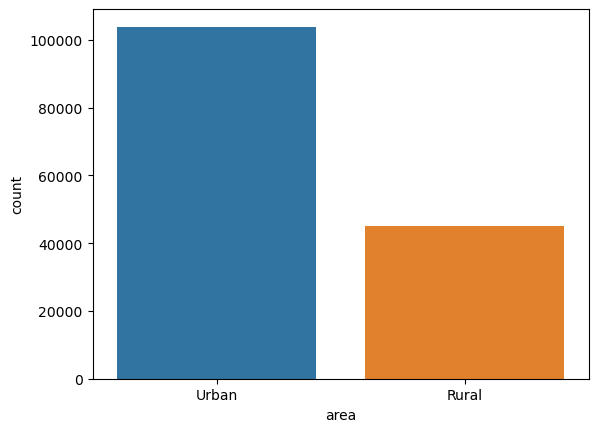

In [20]:
sns.countplot(df["area"])
plt.show()

From the income and area count plots it is observed that most of the customes are earning 5L-10L and most of the customers are from urban area

### categoecal to numerical conversion:

*In the given data set some columns are categorical to inrepret the result we have to convert those colums to numerical values*

In [21]:
from sklearn import preprocessing # Importing the preprocessing 

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()


df['type_of_policy']= label_encoder.fit_transform(df['type_of_policy'])
df['policy']= label_encoder.fit_transform(df['policy'])
df['area']= label_encoder.fit_transform(df['area'])
df['num_policies']= label_encoder.fit_transform(df['num_policies'])
df['income']=label_encoder.fit_transform(df['income'])
df['gender']=label_encoder.fit_transform(df['gender'])
df['qualification']=label_encoder.fit_transform(df['qualification'])

In [22]:
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,source
0,1,1,1,0,1,1,5,5790,1,0,1,64308.0,train
1,2,1,0,1,1,0,8,5080,1,0,1,515400.0,train
2,3,1,1,0,1,1,8,2599,1,0,1,64212.0,train
3,4,0,0,1,1,0,7,0,1,0,1,97920.0,train
4,5,1,1,1,3,1,6,3508,1,0,0,59736.0,train


In [23]:
num_feats = df[['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy']]

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_scaled = scaler.fit_transform(num_feats)
num_scaled[:5]

array([[1.        , 1.        , 0.        , 0.33333333, 1.        ,
        0.625     , 0.17796766, 1.        , 0.        , 0.5       ],
       [1.        , 0.        , 0.5       , 0.33333333, 0.        ,
        1.        , 0.15614434, 1.        , 0.        , 0.5       ],
       [1.        , 1.        , 0.        , 0.33333333, 1.        ,
        1.        , 0.07988566, 1.        , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.33333333, 0.        ,
        0.875     , 0.        , 1.        , 0.        , 0.5       ],
       [1.        , 1.        , 0.5       , 1.        , 1.        ,
        0.75      , 0.10782566, 1.        , 0.        , 0.        ]])

In [25]:
num_scaled_df = pd.DataFrame(num_scaled, columns=num_feats.columns)
num_scaled_df['id']=df['id']
num_scaled_df['source']=df['source']
num_scaled_df['cltv']=df['cltv']
num_scaled_df.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,id,source,cltv
0,1.0,1.0,0.0,0.333333,1.0,0.625,0.177968,1.0,0.0,0.5,1,train,64308.0
1,1.0,0.0,0.5,0.333333,0.0,1.000,0.156144,1.0,0.0,0.5,2,train,515400.0
2,1.0,1.0,0.0,0.333333,1.0,1.000,0.079886,1.0,0.0,0.5,3,train,64212.0
3,0.0,0.0,0.5,0.333333,0.0,0.875,0.000000,1.0,0.0,0.5,4,train,97920.0
4,1.0,1.0,0.5,1.000000,1.0,0.750,0.107826,1.0,0.0,0.0,5,train,59736.0


### Correlation map:

<AxesSubplot:>

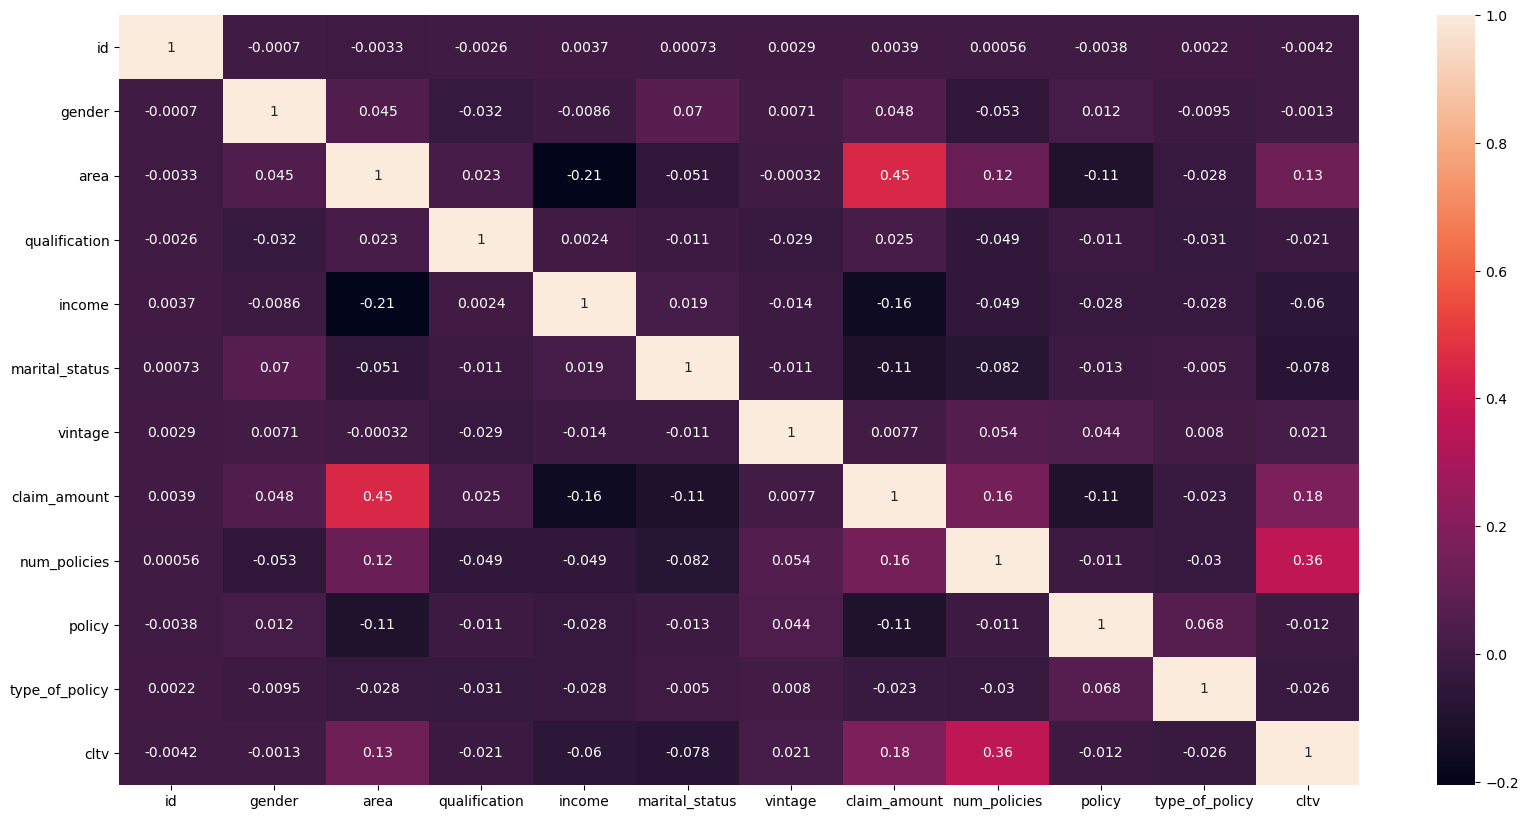

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [27]:


#splitting the data to train and test dataset
train=num_scaled_df.loc[num_scaled_df['source']=='train']
test=num_scaled_df.loc[num_scaled_df['source']=='test']
test.drop(['cltv','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)

In [28]:
#loading the modified train and test dataset
train2=pd.read_csv('train_modified.csv')
test2=pd.read_csv('test_modified.csv')

In [29]:
train2.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,id,cltv
0,1.0,1.0,0.0,0.333333,1.0,0.625,0.177968,1.0,0.0,0.5,1,64308.0
1,1.0,0.0,0.5,0.333333,0.0,1.000,0.156144,1.0,0.0,0.5,2,515400.0
2,1.0,1.0,0.0,0.333333,1.0,1.000,0.079886,1.0,0.0,0.5,3,64212.0
3,0.0,0.0,0.5,0.333333,0.0,0.875,0.000000,1.0,0.0,0.5,4,97920.0
4,1.0,1.0,0.5,1.000000,1.0,0.750,0.107826,1.0,0.0,0.0,5,59736.0


In [30]:
train2.shape

(89392, 12)

In [31]:
test2.shape

(59595, 11)

In [32]:
#taking the input and output columns
x_train=train2.drop(['id','cltv'],axis=1)
y_train=train2.cltv

In [33]:
x_train.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,1.0,1.0,0.0,0.333333,1.0,0.625,0.177968,1.0,0.0,0.5
1,1.0,0.0,0.5,0.333333,0.0,1.000,0.156144,1.0,0.0,0.5
2,1.0,1.0,0.0,0.333333,1.0,1.000,0.079886,1.0,0.0,0.5
3,0.0,0.0,0.5,0.333333,0.0,0.875,0.000000,1.0,0.0,0.5
4,1.0,1.0,0.5,1.000000,1.0,0.750,0.107826,1.0,0.0,0.0


In [34]:
#splitting the dataset for trainng and testing
from sklearn import model_selection
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x_train,y_train,test_size=0.2,random_state=42)

### prediction using Linear regression

In [35]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()

#fitting the data
lm5=lin.fit(xtrain,ytrain)

#predicting the data
predictions=lin.predict(xtest)

In [36]:
#computing r2 value
print("R*2:",r2_score(ytest,predictions))

R*2: 0.1507658992531158


### Prediction using Ridge regression

In [37]:
from sklearn.linear_model import Ridge
rdg = Ridge(alpha = 0.5)

#fittng the data
rm5=rdg.fit(xtrain,ytrain)
pred_ridge=rdg.predict(xtest)

In [38]:
#computing R2 value
print("R*2:",r2_score(ytest,pred_ridge))

R*2: 0.15076626705765417


### Prediction using Lasso Regression

In [39]:
from sklearn import linear_model
Lreg = linear_model.Lasso(alpha = 0.5)

#fitting the data
lm=Lreg.fit(xtrain,ytrain)
pred_lasso=Lreg.predict(xtest)

In [40]:
#computing the R2 value
print("R*2:",r2_score(ytest,pred_lasso))

R*2: 0.15076655465060695


### Prediction using Polynomial regression

In [41]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=3)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pp=pipe.fit(xtrain,ytrain)

In [42]:
#predicting the values from the model
pred_poly=pipe.predict(xtest)

#printing R2 value
print("R*2:",r2_score(ytest,pred_poly))

R*2: 0.15896141692997534


### Prediction using Bayesian Ridge Regression

In [43]:
from sklearn import linear_model
BayReg = linear_model.BayesianRidge()

#fitting the date into model
BayReg.fit(xtrain,ytrain)
pred_bay=BayReg.predict(xtest)

In [44]:
#computing the R2 value
print("R*2:",r2_score(ytest,pred_bay))

R*2: 0.15076916282237152


### Prediction using MLP Regressior

In [45]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(solver='lbfgs', 
                   alpha=1,     # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(150, 10), random_state=24)
clf.fit(xtrain, ytrain)
res = clf.predict(xtest)

In [46]:
print("R*2:",r2_score(ytest,res))

R*2: 0.1572257274879455


### Prediction using DecissionTree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=5.5)
tree.fit(xtrain, ytrain)
target_predicted = tree.predict(xtest)

In [48]:
print("R*2:",r2_score(ytest,target_predicted))

R*2: 0.1571807407890724


### Prediction Using RandomForestRegressor

In [63]:
from sklearn.ensemble import RandomForestRegressor
rfri=RandomForestRegressor(max_depth=6.5)
rfri.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=6.5)

In [64]:
pred_rfr=rfri.predict(xtest)

In [65]:
print("R*2:",r2_score(ytest,pred_rfr))

R*2: 0.15863040928081118


### Prediction using KNN Regressor

In [52]:
from sklearn import neighbors

model = neighbors.KNeighborsRegressor(n_neighbors = 250)

model.fit(xtrain, ytrain)  #fit the model
pred=model.predict(xtest) #make prediction on test set

In [53]:
print("R*2:",r2_score(ytest,pred))

R*2: 0.151305772494433


In [54]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=35000,
                        min_samples=20000,
                        residual_threshold=5.0,
                        random_state=42)
ransac.fit(xtrain, ytrain)

RANSACRegressor(base_estimator=LinearRegression(), max_trials=35000,
                min_samples=20000, random_state=42, residual_threshold=5.0)

In [55]:
predi=ransac.predict(xtest)

In [56]:
print("R*2:",r2_score(ytest,predi))

R*2: 0.15042602824702667


In [57]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn import neighbors
rmse_val = [] #to store rmse values for different k

model = neighbors.KNeighborsRegressor(n_neighbors = 250)
rdg = Ridge(alpha = 0.5)

clf = MLPRegressor(solver='lbfgs', 
                   alpha=1,     # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(150, 7), random_state=24)\

#Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=5)
rfr=RandomForestRegressor(max_depth=5)
RegModel = AdaBoostRegressor(n_estimators=1, base_estimator=rfr ,learning_rate=120)
 
#Printing all the parameters of Adaboost
print(RegModel)
 
#Creating the model on Training Data
AB=RegModel.fit(xtrain,ytrain)
prediction=AB.predict(xtest)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=5),
                  learning_rate=120, n_estimators=1)


In [58]:
print("R*2:",r2_score(ytest,prediction))

R*2: 0.1576174154356068


In [66]:
pred_bay=rfri.predict(test2.drop(['id'],axis=1))
pred_bay


array([ 91166.62590677, 126693.57930008,  97474.4926594 , ...,
       103625.06535704, 101604.33995882, 120844.08468969])

In [67]:
pred_df = pd.DataFrame(pred_bay, columns=['cltv'])

In [68]:
pred_df.insert(0, 'id', test2.id)

In [69]:
#creating the submission file
pred_df.to_csv("CLTV_pred.csv",index=False)

In [70]:
pred_df

,id,cltv
0,89393,91166.625907
1,89394,126693.579300
2,89395,97474.492659
3,89396,89818.405970
4,89397,142296.778049
...,...,...
59590,148983,46743.724665
59591,148984,50594.027356
59592,148985,103625.065357
59593,148986,101604.339959
